In [3]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve, classification_report

In [4]:
df = pd.read_csv(r"./data/bank_data.csv")
df = df.sample(200)
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1941,1941,720802833,Existing Customer,26,F,1,High School,Single,Less than $40K,Blue,...,2,3,2404.0,1198,1206.0,0.501,2692,63,0.500,0.498
4356,4356,713856708,Existing Customer,48,M,4,High School,Married,$80K - $120K,Blue,...,1,2,6798.0,2517,4281.0,0.873,4327,79,0.881,0.370
9090,9090,826451433,Existing Customer,42,M,4,Graduate,Single,$80K - $120K,Silver,...,1,3,34516.0,2273,32243.0,0.860,8502,103,0.717,0.066
9191,9191,713708358,Existing Customer,33,F,3,Unknown,Single,$40K - $60K,Silver,...,3,3,19594.0,971,18623.0,0.761,12429,111,0.542,0.050
4417,4417,708084558,Attrited Customer,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214


In [5]:
df.shape

(200, 22)

In [6]:
df.isnull().sum()

Unnamed: 0                  0
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4922.370000,7.407893e+08,46.400000,2.300000,35.960000,3.840000,2.430000,2.475000,8120.229000,1230.455000,6889.774000,0.752805,4430.955000,64.930000,0.712195,0.292260
std,2905.254985,3.787090e+07,8.259607,1.215478,7.626877,1.505234,1.034627,1.002196,8410.220997,832.761386,8458.477114,0.220326,3684.687669,24.035884,0.210684,0.279525
min,24.000000,7.080846e+08,26.000000,0.000000,13.000000,1.000000,1.000000,0.000000,1438.300000,0.000000,160.000000,0.000000,886.000000,15.000000,0.000000,0.000000
25%,2308.000000,7.133190e+08,40.750000,1.000000,32.000000,3.000000,2.000000,2.000000,2570.500000,639.000000,1205.000000,0.636500,2125.250000,46.750000,0.590000,0.041750
50%,4836.000000,7.187067e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4587.500000,1331.500000,3287.500000,0.745000,3742.500000,65.000000,0.714000,0.205500
75%,7520.500000,7.785958e+08,52.250000,3.000000,41.000000,5.000000,3.000000,3.000000,9999.000000,1890.250000,8775.500000,0.850000,4670.250000,81.000000,0.811000,0.511250
max,10043.000000,8.270518e+08,70.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,1.675000,17437.000000,132.000000,1.476000,0.940000


In [8]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

quant_columns = [
    'Customer_Age',
    'Dependent_count', 
    'Months_on_book',
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt',
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio'
]

In [9]:
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)

In [10]:
list(df['Churn'].unique())

[0, 1]

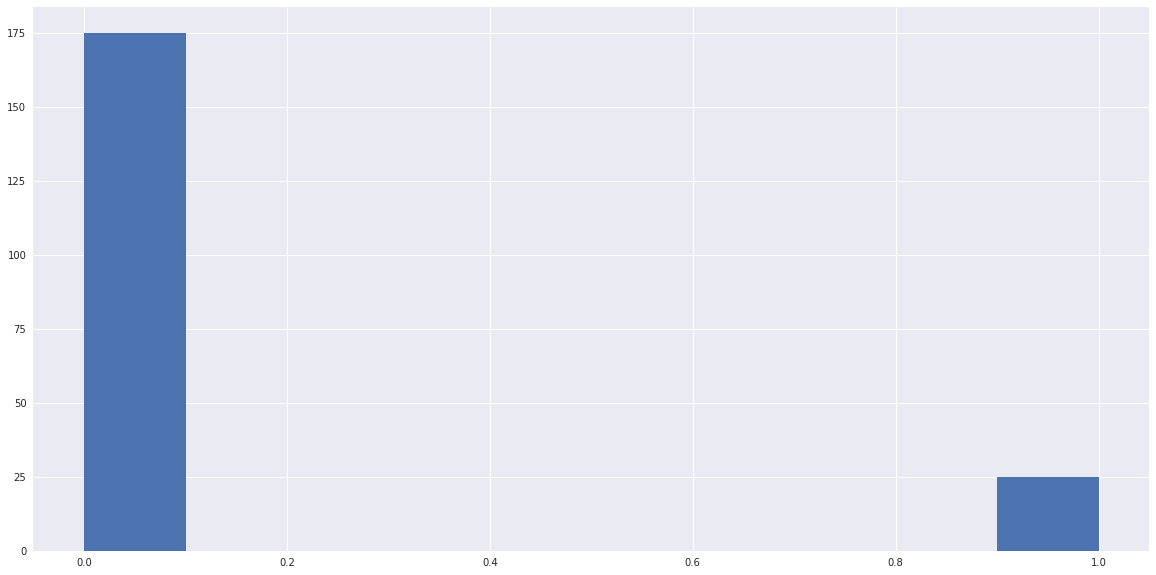

In [11]:
plt.figure(figsize=(20,10)) 
df['Churn'].hist();

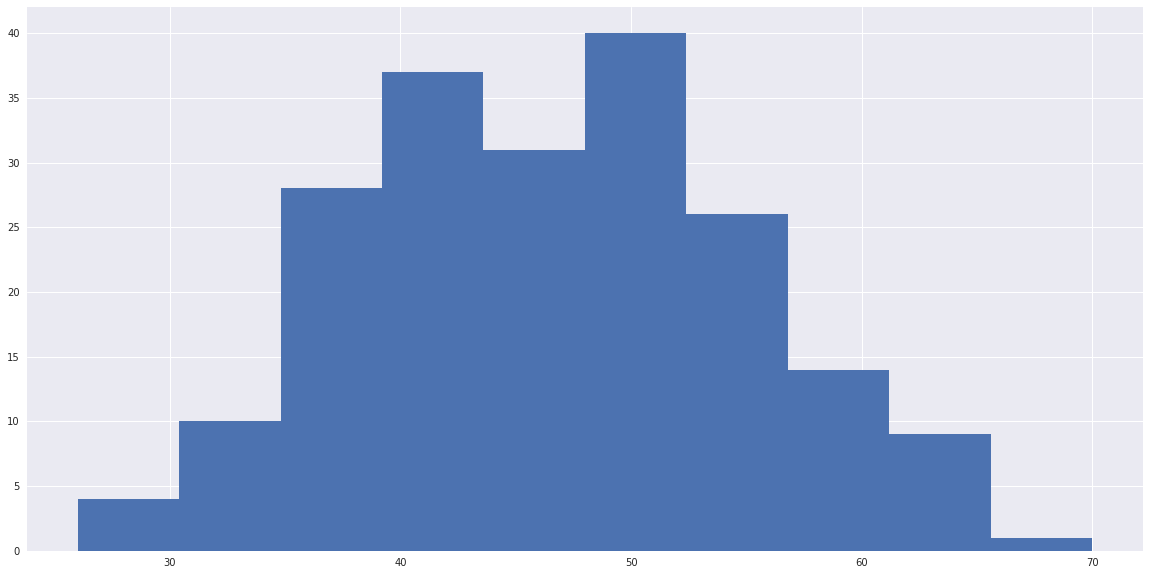

In [12]:
plt.figure(figsize=(20,10)) 
df['Customer_Age'].hist();

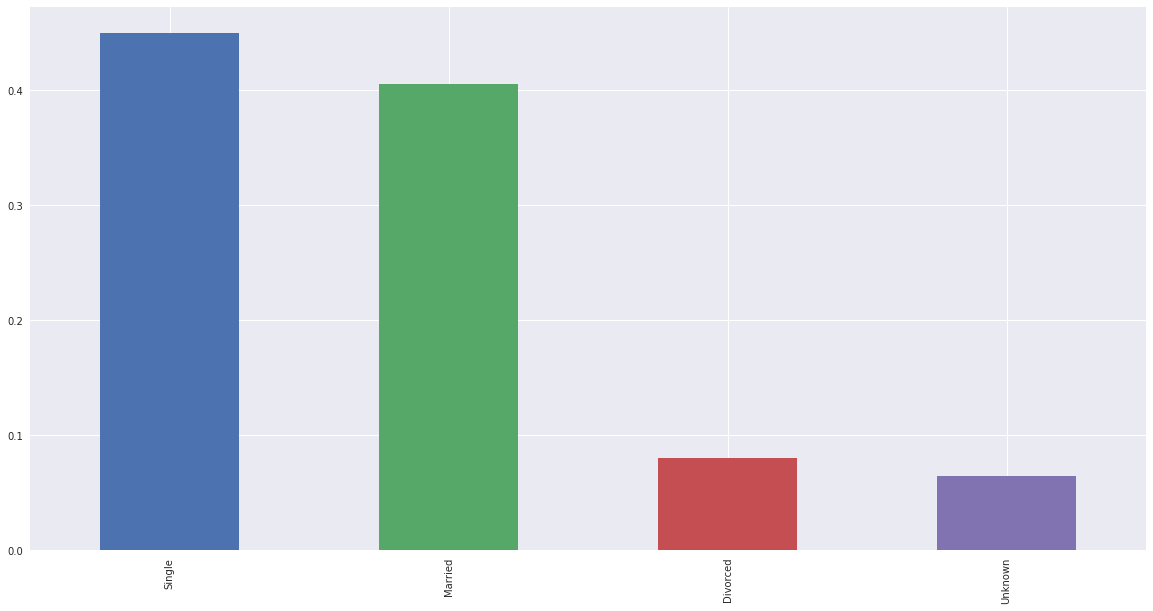

In [13]:
plt.figure(figsize=(20,10)) 
df.Marital_Status.value_counts('normalize').plot(kind='bar');

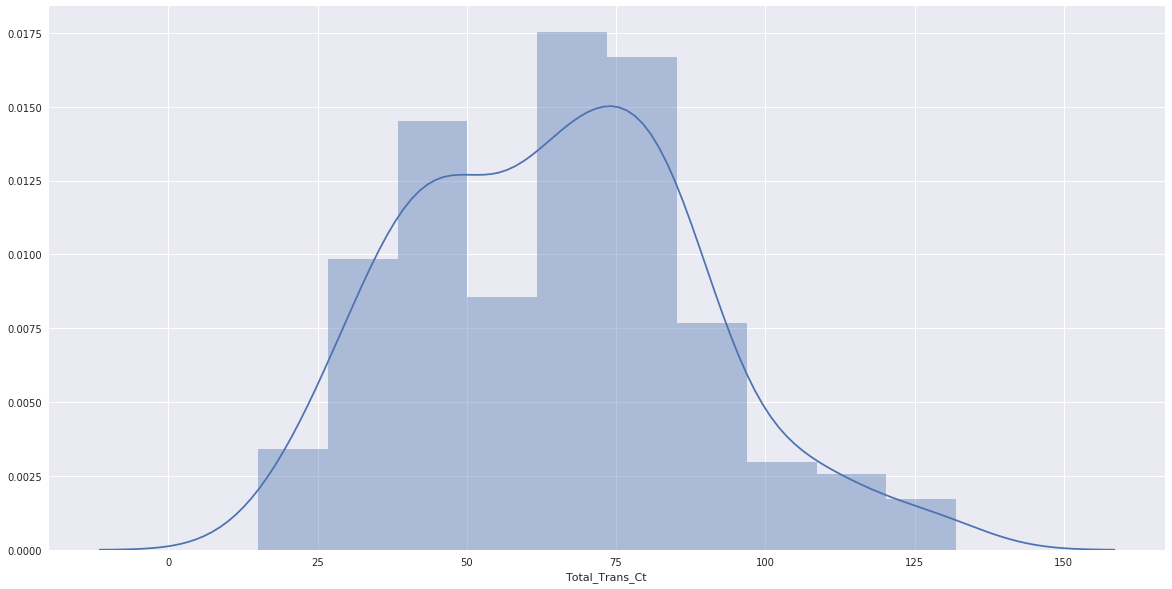

In [14]:
plt.figure(figsize=(20,10)) 
sns.distplot(df['Total_Trans_Ct']);

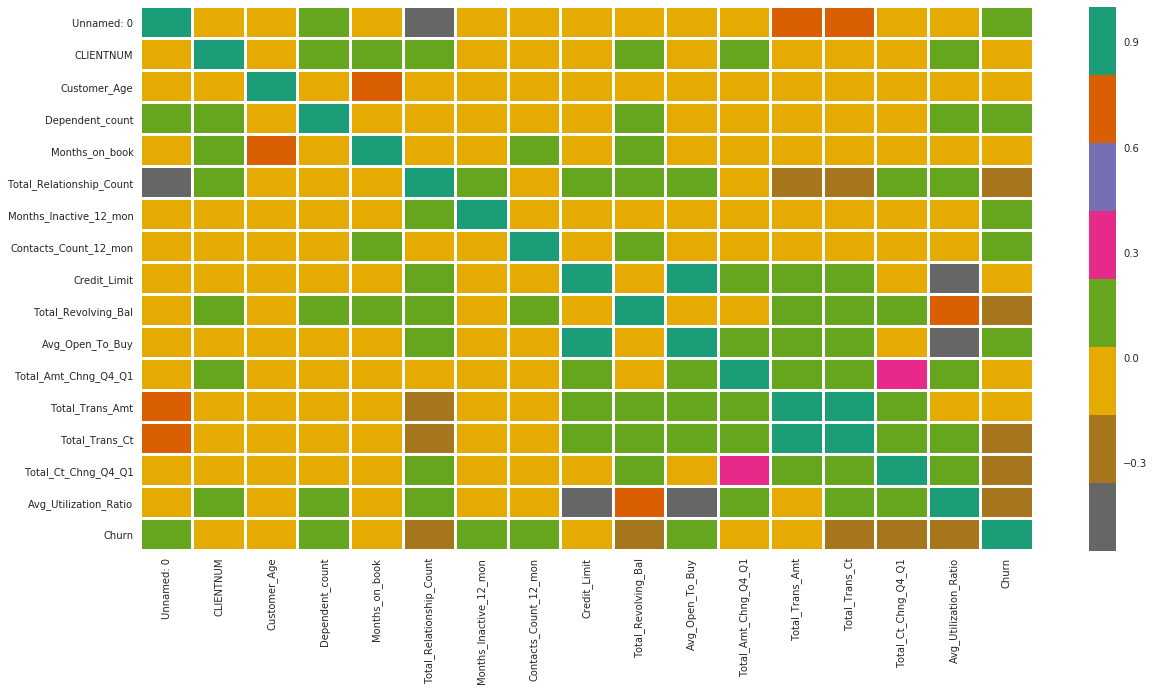

In [15]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

In [16]:
y = df['Churn']

In [17]:
X = pd.DataFrame()

In [18]:
# gender encoded column
gender_lst = []
gender_groups = df.groupby('Gender').mean()['Churn']

for val in df['Gender']:
    gender_lst.append(gender_groups.loc[val])

df['Gender_Churn'] = gender_lst    
#education encoded column
edu_lst = []
edu_groups = df.groupby('Education_Level').mean()['Churn']

for val in df['Education_Level']:
    edu_lst.append(edu_groups.loc[val])

df['Education_Level_Churn'] = edu_lst

#marital encoded column
marital_lst = []
marital_groups = df.groupby('Marital_Status').mean()['Churn']

for val in df['Marital_Status']:
    marital_lst.append(marital_groups.loc[val])

df['Marital_Status_Churn'] = marital_lst

#income encoded column
income_lst = []
income_groups = df.groupby('Income_Category').mean()['Churn']

for val in df['Income_Category']:
    income_lst.append(income_groups.loc[val])

df['Income_Category_Churn'] = income_lst

#card encoded column
card_lst = []
card_groups = df.groupby('Card_Category').mean()['Churn']
 
for val in df['Card_Category']:
    card_lst.append(card_groups.loc[val])

df['Card_Category_Churn'] = card_lst
    
    

In [19]:
keep_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Gender_Churn', 'Education_Level_Churn', 'Marital_Status_Churn', 
             'Income_Category_Churn', 'Card_Category_Churn']

X[keep_cols] = df[keep_cols]

In [20]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
1941,26,1,13,3,2,3,2404.0,1198,1206.0,0.501,2692,63,0.500,0.498,0.155963,0.121951,0.166667,0.125000,0.122905
4356,48,4,36,5,1,2,6798.0,2517,4281.0,0.873,4327,79,0.881,0.370,0.087912,0.121951,0.086420,0.125000,0.122905
9090,42,4,38,2,1,3,34516.0,2273,32243.0,0.860,8502,103,0.717,0.066,0.087912,0.129032,0.166667,0.125000,0.157895
9191,33,3,36,2,3,3,19594.0,971,18623.0,0.761,12429,111,0.542,0.050,0.155963,0.100000,0.166667,0.146341,0.157895
4417,46,3,38,6,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214,0.087912,0.230769,0.125000,0.125000,0.122905


In [21]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

# grid search
rfc = RandomForestClassifier(random_state=42)
lrc = LogisticRegression()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,100],
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
cv_rfc.fit(X_train, y_train)

lrc.fit(X_train, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

y_train_preds_lr = lrc.predict(X_train)
y_test_preds_lr = lrc.predict(X_test)

# scores
print('random forest results')
print('test results')
print(classification_report(y_test, y_test_preds_rf))
print('train results')
print(classification_report(y_train, y_train_preds_rf))

print('logistic regression results')
print('test results')
print(classification_report(y_test, y_test_preds_lr))
print('train results')
print(classification_report(y_train, y_train_preds_lr))

random forest results
test results
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        52
           1       0.00      0.00      0.00         8

    accuracy                           0.87        60
   macro avg       0.43      0.50      0.46        60
weighted avg       0.75      0.87      0.80        60

train results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        17

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

logistic regression results
test results
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        52
           1       0.50      0.12      0.20         8

    accuracy                           0.87        60
   macro avg       0.69      0.55     

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


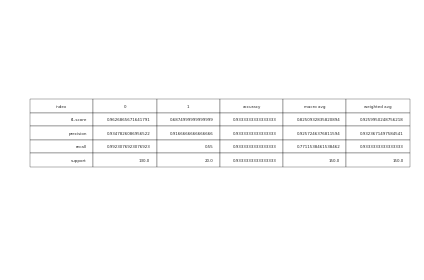

In [90]:
report = classification_report(y_test, y_test_preds_rf,output_dict=True)
report_df = pd.DataFrame(report).reset_index()

#define figure and axes
fig, ax = plt.subplots()

table = ax.table(cellText=report_df.values, 
                 colLabels=report_df.columns, 
                 loc='center')

#modify table
table.set_fontsize(20)
ax.axis('off')

#display table
fig.tight_layout()
plt.savefig('table1.png', dpi=200)

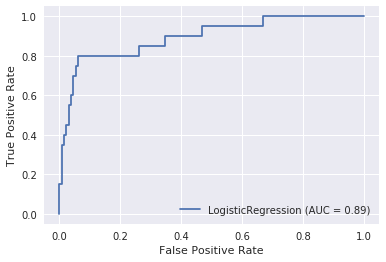

In [36]:

lrc_plot = plot_roc_curve(lrc, X_test, y_test)

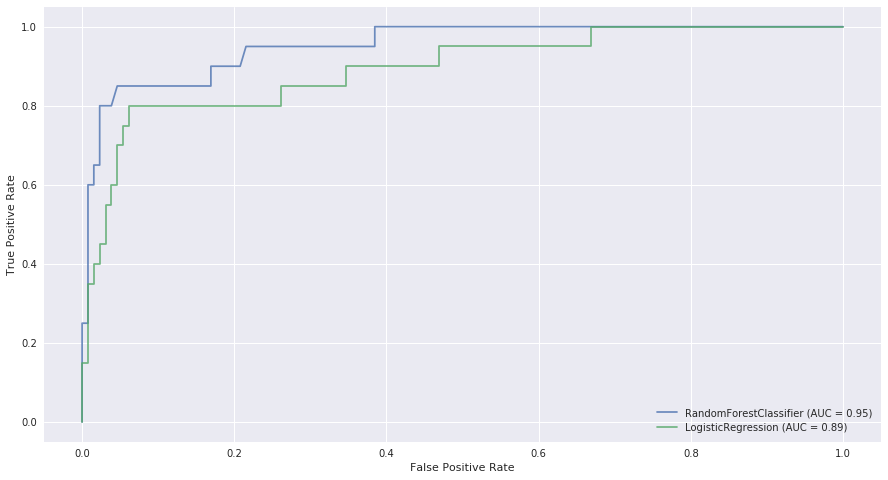

In [37]:
# plots
plt.figure(figsize=(15, 8))
ax = plt.gca()
rfc_disp = plot_roc_curve(cv_rfc.best_estimator_, X_test, y_test, ax=ax, alpha=0.8)
lrc_plot.plot(ax=ax, alpha=0.8)
plt.show()

In [38]:
# save best model
joblib.dump(cv_rfc.best_estimator_, './models/rfc_model.pkl')
joblib.dump(lrc, './models/logistic_model.pkl')

['./models/logistic_model.pkl']

In [39]:
rfc_model = joblib.load('./models/rfc_model.pkl')
lr_model = joblib.load('./models/logistic_model.pkl')

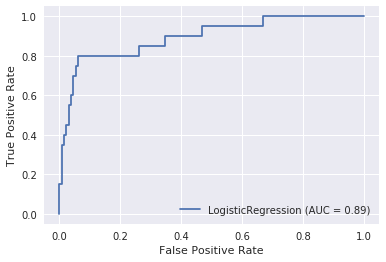

In [40]:
lrc_plot = plot_roc_curve(lr_model, X_test, y_test)

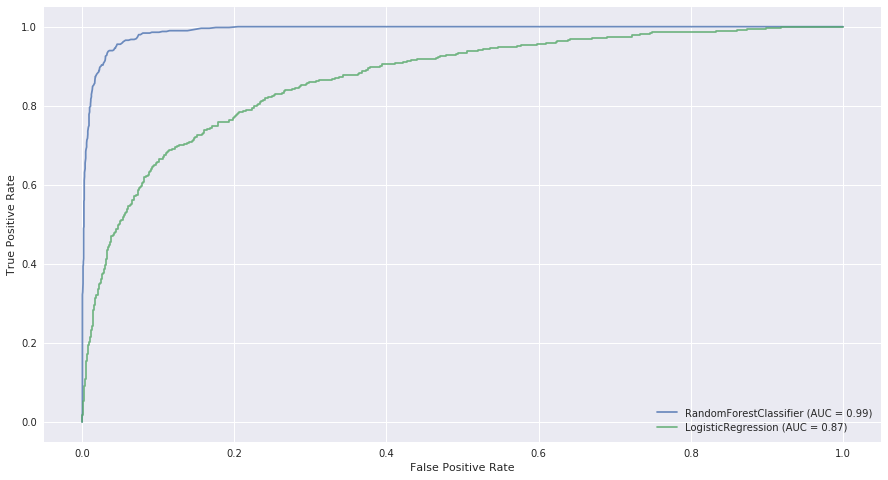

In [24]:
plt.figure(figsize=(15, 8))
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc_model, X_test, y_test, ax=ax, alpha=0.8)
lrc_plot.plot(ax=ax, alpha=0.8)
plt.show()

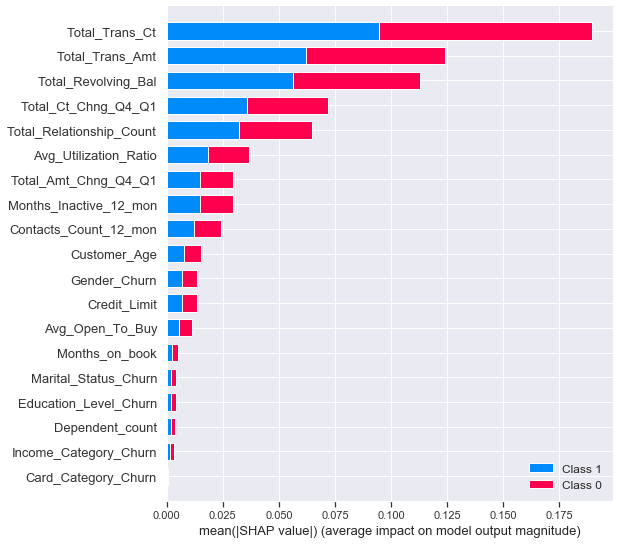

In [46]:
explainer = shap.TreeExplainer(cv_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

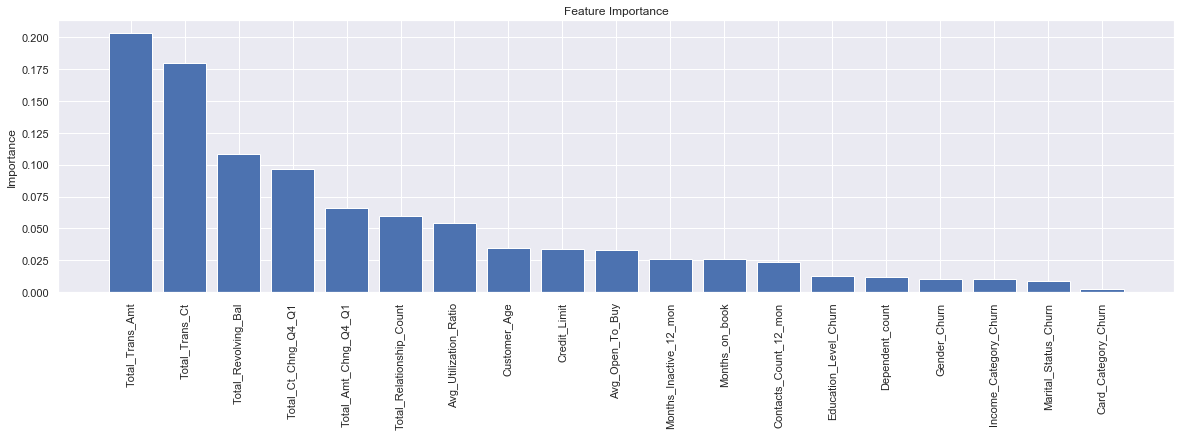

In [93]:
# Calculate feature importances
importances = cv_rfc.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,5))

# Create plot title
plt.title("Feature Importance")
plt.ylabel('Importance')

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90);

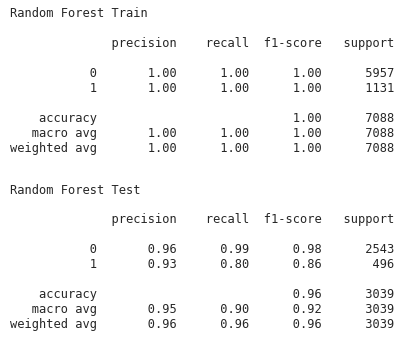

In [99]:
plt.rc('figure', figsize=(5, 5))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 1.25, str('Random Forest Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_test, y_test_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Random Forest Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_train, y_train_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off');


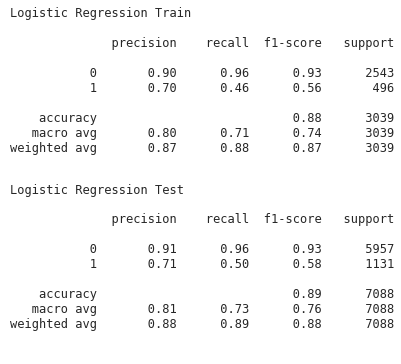

In [98]:
plt.rc('figure', figsize=(5, 5))
plt.text(0.01, 1.25, str('Logistic Regression Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_train, y_train_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Logistic Regression Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_test, y_test_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off');